# Predicting heart disease using Machine Learning

This notebook looks into using various Python-based Machine learning  and Data-Science libraries in an attempt to build a machine learning model capable of  predicting wheather or not someone has heart-disease based on their medical attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Expreimentation

## 1. Problem Definition.
 
In a statement;
>Given clinical parameters about a patient, can we predict wheather or not they have heart-disease?

## 2. Data

> The original data came from Cleavland Data from UCI Machine learning repository and the main sv file was downloaded from Kaggle.

## 3. Evaluation

> Goal to reach alteast 95% accuracy Predicting wheather or not a patient has a heart-disease 

## 4. Features

> Features in this Dataset

**Create Data Dictionary**

1. age - age in years
2. sex- (1=male; 0=female)
3. cp - chest pain type (4 values)
     * 0: Typical angina: chest pain related to decrease blood supply to the heart
     * 1: Atypical angina : chest pain not related to heart
     * 2: Non-anginal pain: typically esophageal spasms (non heart related)
     * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure(in mm Hg on admission to the hospital)
     * anything above 130-140 is typically cause for concern 
5. chol - serum cholestoral in mg/dl
     * serum + LDL + HDL + .2*triglycerides
     * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = ture; 0 = false)
     * '>126'mg/dl signal diabetes
7. restecg - resting electrocardiographic results (values 0,1,2)
     * 0: Nothing to note
     * 1: St-T Wave abnormality
          - can range from mild symptoms to sever problems 
          - signals non-normal heart beat
     * 2: Possible or definite left ventricular hypertrophy
          - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina
10. oldpeak - ST depression induced by exercise relative to rest
     * looks at stress of heart during exercise
     * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
     * 0: Unsloping: better heart rate with exercise(uncommon)
     * 1: Flatsloping: minimal change(typical healthy heart)
     * 2: Downsloping: sign of unhealthy heart
12. number of major vessels (0-3) colored by flourosopy
     * colored vessel means the doctor can see the blood passing through
13. thal - thallium stress result 
     * 1,3 : normal
     * 6: fixed defect: used to be defect but okay now
     * 7: reversable defect: no proper blood movement when exercising
14. target - have disease or not (1=yes; 0=no) (=the predicted attribute)




## Preparing the tools

We are going to use Pandas,Numpy and Matplotlib for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Data scaling
from sklearn import preprocessing 

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape # (rows,columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and beacome a subject matter export on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with them?
4. Where are the outliers and why should you care about them?
5. How can you add,change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class is there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

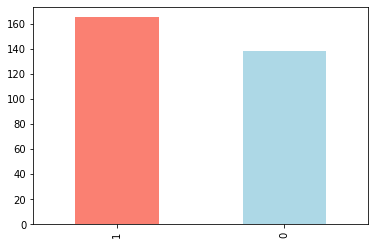

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


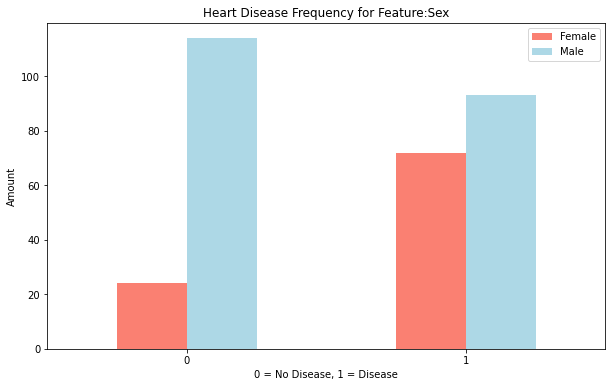

In [13]:
# Creating a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Feature:Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);


In [14]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

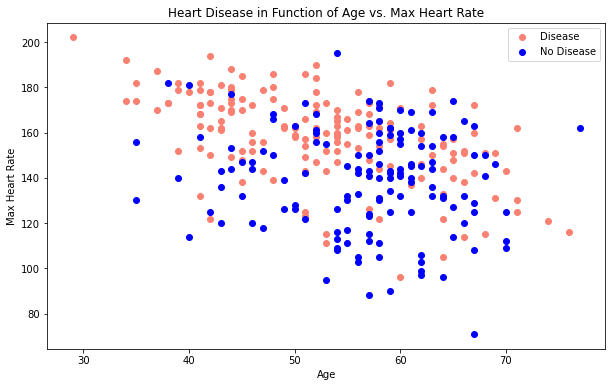

In [15]:
# creating another figure
plt.figure(figsize=(10,6))

# Scatter plot with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="blue");

plt.title("Heart Disease in Function of Age vs. Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

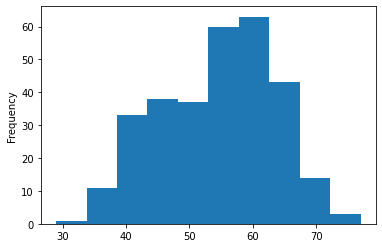

In [16]:
# Checking the distribution of age column with a histogram
df.age.plot.hist();

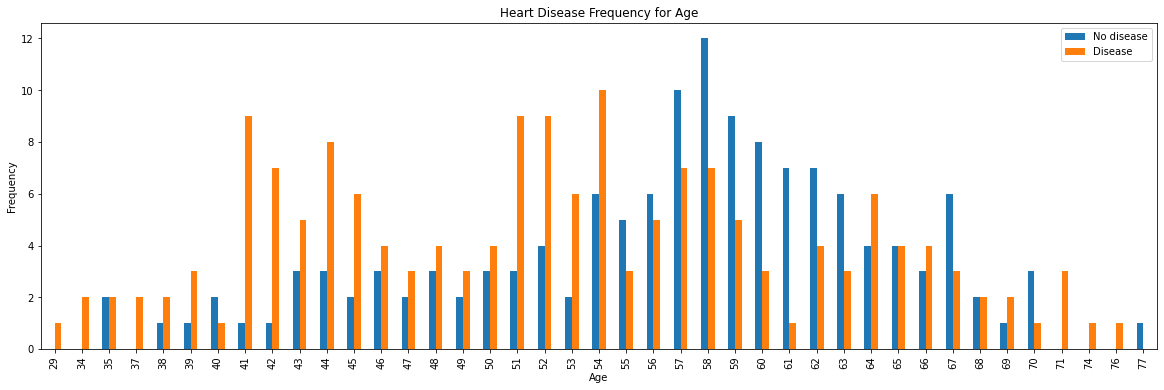

In [17]:
### Heart Disease Frequency for Ages
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title("Heart Disease Frequency for Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(["No disease","Disease"]);


### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type (4 values)
    * 0: Typical angina: chest pain related to decrease blood supply to the heart
    * 1: Atypical angina : chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease



In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


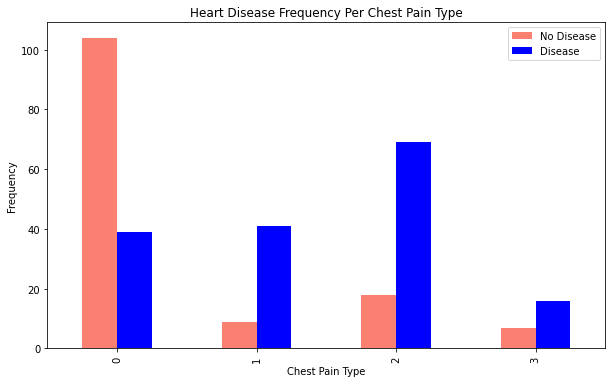

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","blue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"]);

### Heart Disease Frequency for Slope

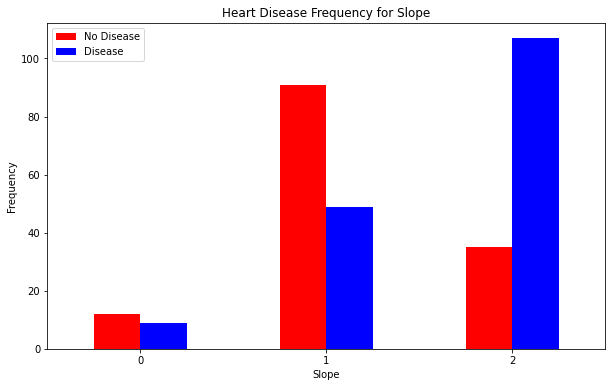

In [20]:
pd.crosstab(df.slope,df.target).plot(kind="bar",
                                     figsize=(10,6),
                                     color=["red","blue"])

plt.title("Heart Disease Frequency for Slope")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

### Heart Disease Frequency According to FBS

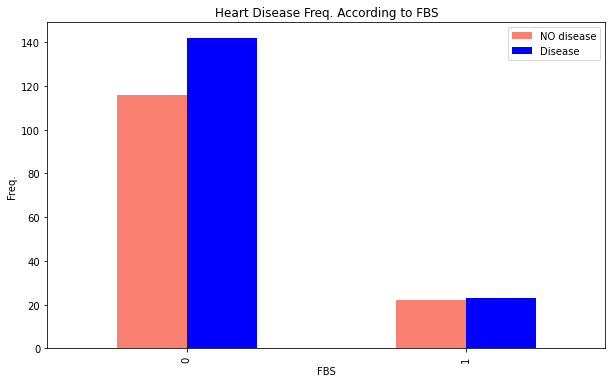

In [21]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=['salmon','blue'])

plt.title("Heart Disease Freq. According to FBS")
plt.xlabel("FBS")
plt.ylabel("Freq.")
plt.legend(["NO disease","Disease"]);


In [22]:
# Making a correlation matrix
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


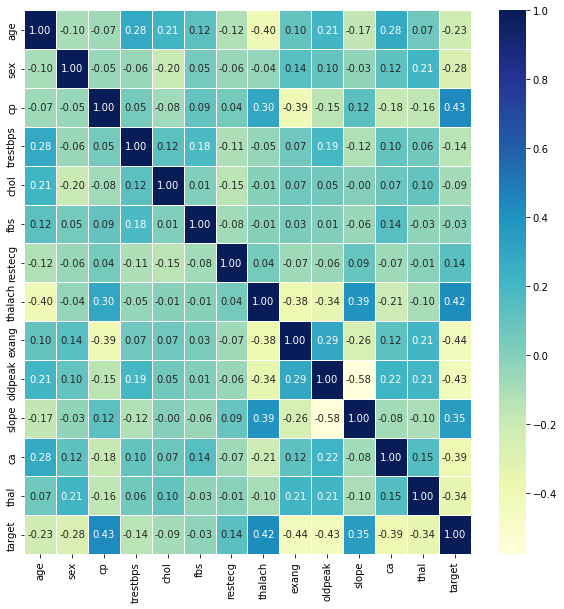

In [23]:
#  Visualizing correlation matrix 
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


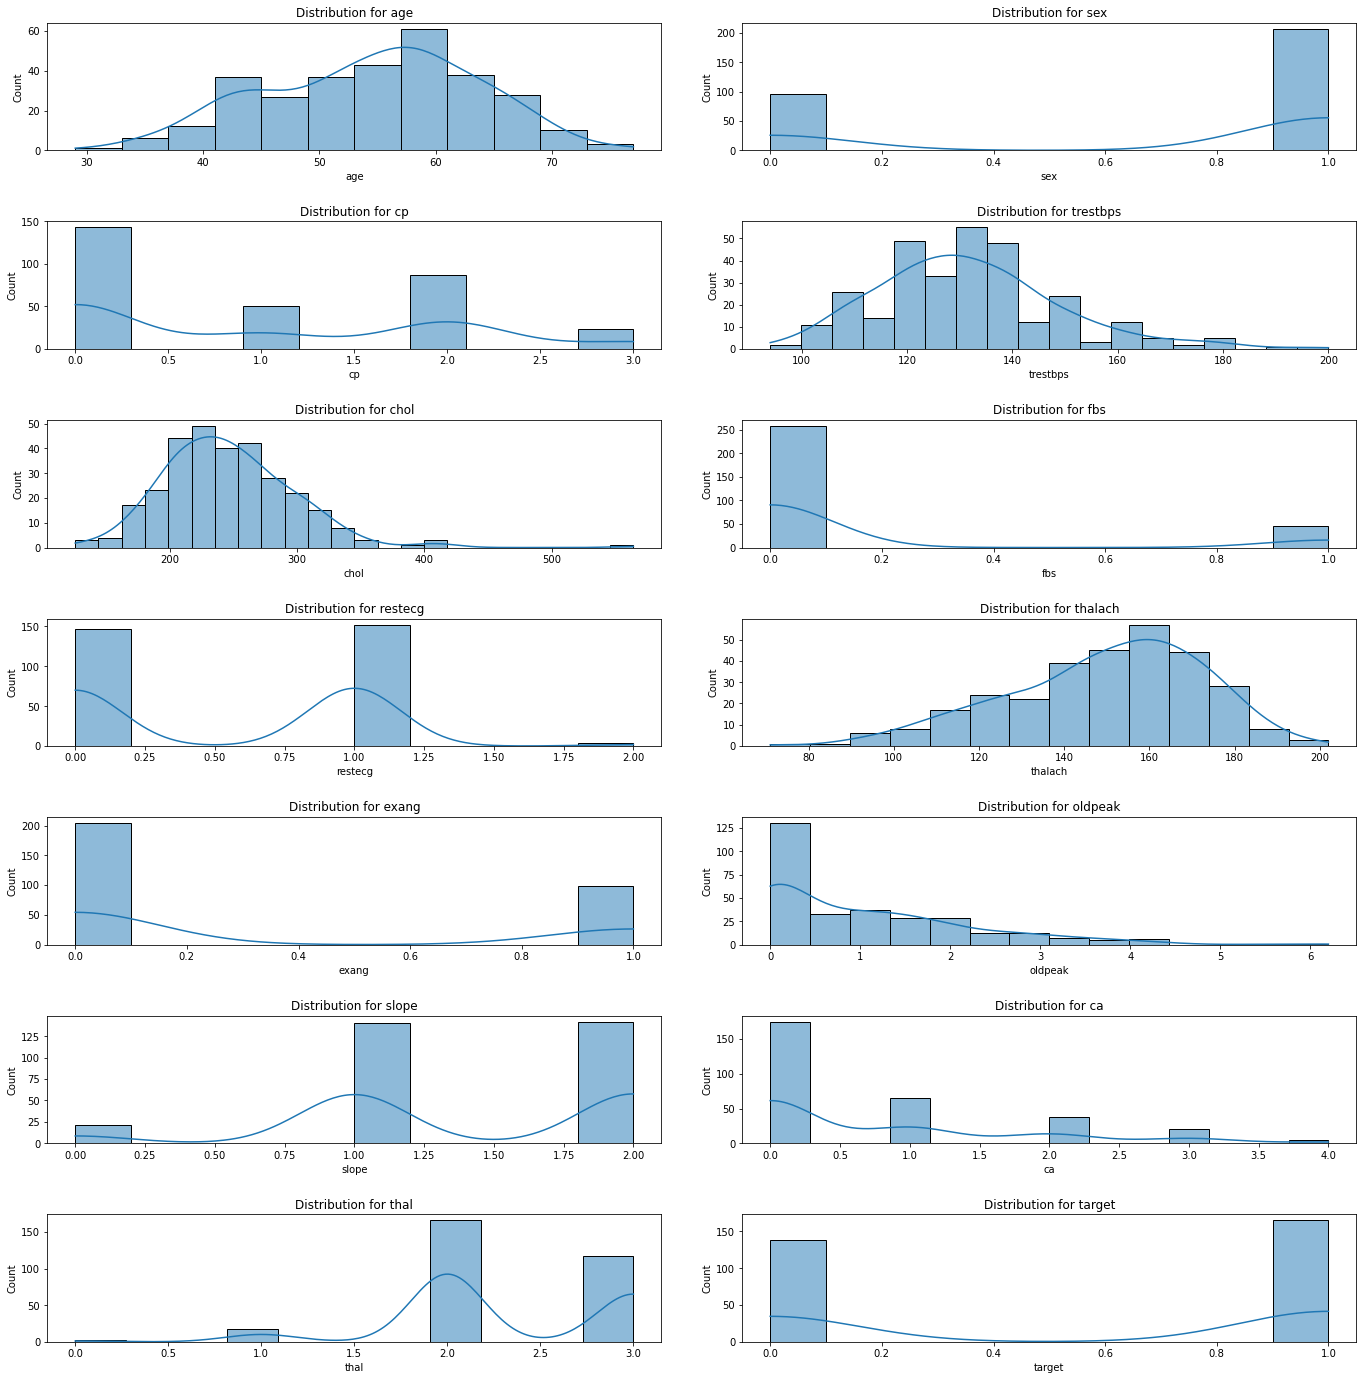

In [28]:
## Histogram for all features
numeric_features = df.columns
numeric_features

row,col = 7,2
fig,axis = plt.subplots(row,col,figsize=(20,20))
plt.tight_layout(pad=5.0)
col_num = 0
for i in range(row):
    for j in range(col):
        if col_num > (len(df.columns)-1):
            break
        sns.histplot(ax=axis[i,j],x=df[numeric_features[col_num]],kde=True)
        axis[i,j].set_title(f"Distribution for {numeric_features[col_num]}")
        axis[i,j].set_label(numeric_features[col_num])
        col_num +=1


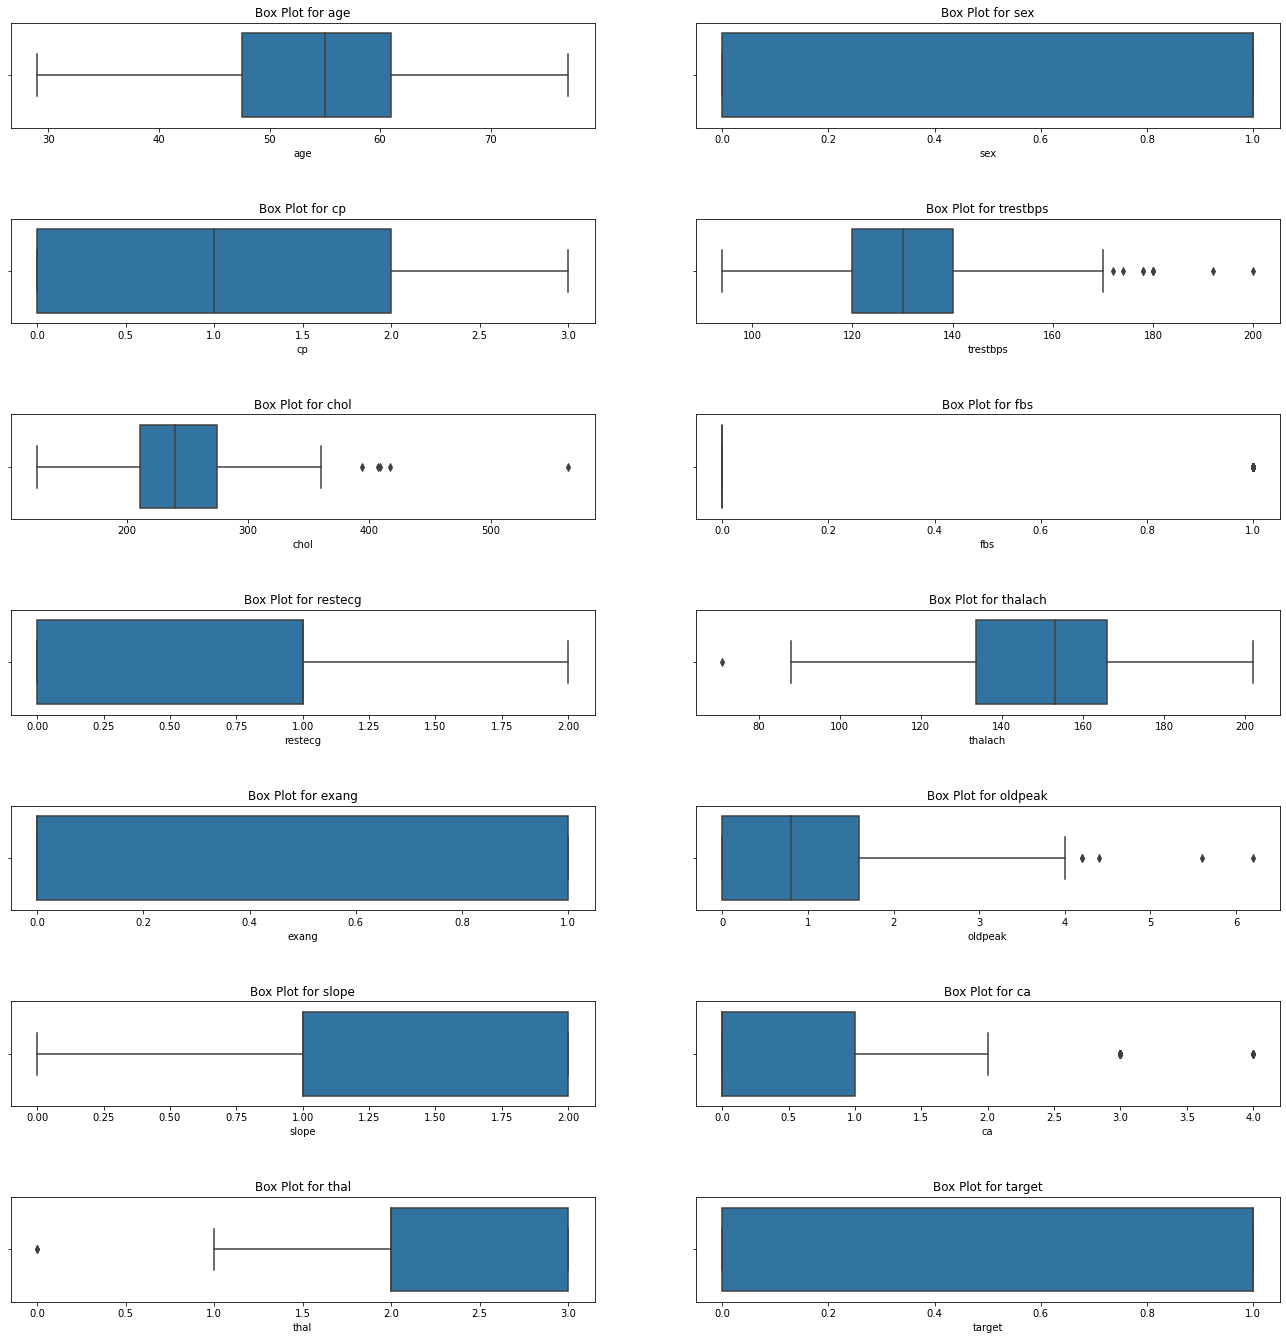

In [40]:
## Checking for Outlier
row,col = 7,2
fig,axis= plt.subplots(row,col,figsize=(20,20))
plt.tight_layout(pad=7.0)
cnt = 0
for i in range(row):
    for j in range(col):
        if cnt > (len(df.columns)-1):
            break
        sns.boxplot(ax= axis[i,j],x = df[numeric_features[cnt]])
        axis[i,j].set_label(numeric_features[cnt])
        axis[i,j].set_title(f"Box Plot for {numeric_features[cnt]}")
        cnt += 1

## 5. Modelling

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
# Splitting data into X and Y
x = df.drop("target",axis=1)

y = df.target

In [43]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [44]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [45]:
# Splitting the data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [46]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [47]:
y_train, y_train.shape

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 (242,))

- Now we have got our data splitted into training and test sets.
- We will train it to find the patterns on the training set.
- and we will test it using the patterns on the test set.

### Logistic Regression

In [48]:
# Fitting and Evaluating Model
np.random.seed(42)

lr = LogisticRegression()
lr.fit(X_train,y_train)
accuracy = lr.score(X_test,y_test)*100

print("Test Accuracy {:.2f}%".format(accuracy))

Test Accuracy 88.52%


### K-Nearest Neighbors (KNN)

In [49]:
# Fitting and Evaluating Model
np.random.seed(42)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
accuracy = knn.score(X_test,y_test)*100

print("Test Accuracy {:.2f}%".format(accuracy))

Test Accuracy 68.85%


### Random Forest Classifier

In [50]:
# Fitting and Evaluating Model
np.random.seed(42)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
accuracy = rf.score(X_test,y_test)*100

print("Test Accuracy {:.2f}%".format(accuracy))

Test Accuracy 83.61%


### Support Vector Machine

In [51]:
# Fitting and Evaluating Model
np.random.seed(42)

svm = SVC()
svm.fit(X_train,y_train)
accuracy = svm.score(X_test, y_test)*100

print("Test Accuracy {:.2f}%".format(accuracy))

Test Accuracy 70.49%


### Gradient Boosting Classifier

In [52]:
np.random.seed(42)

gd = GradientBoostingClassifier().fit(X_train,y_train)
acc = gd.score(X_test,y_test)
print(f"Test Accuracy {accuracy:.2f}%")

Test Accuracy 70.49%


### All model

In [53]:
# Put all models in a Dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SVM": SVC(),
          "GradientBoosting Classifier":GradientBoostingClassifier(),
          "Ada Boost Classifier":AdaBoostClassifier(),
          "GaussianNB":GaussianNB(),
          "Linear SVC":LinearSVC(),
          "SGD Classifier":SGDClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train,X_test,y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dictionary of different Scikit-learn machine learning models
    X_train : traing data
    X_test : test data
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)*100
    return model_scores

In [54]:
model_scores = fit_and_score( models,X_train,X_test,y_train,y_test)

model_scores

{'Logistic Regression': 88.52459016393442,
 'KNN': 68.85245901639344,
 'Random Forest': 83.60655737704919,
 'SVM': 70.49180327868852,
 'GradientBoosting Classifier': 77.04918032786885,
 'Ada Boost Classifier': 80.32786885245902,
 'GaussianNB': 86.88524590163934,
 'Linear SVC': 85.24590163934425,
 'SGD Classifier': 60.65573770491803,
 'DecisionTreeClassifier': 83.60655737704919}

### Model Comparison

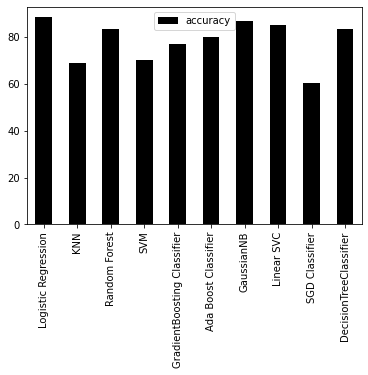

In [55]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar",color='black');

#### Now we have got a baseline model

### Next Steps 

* Hyperparameter Tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning

In [56]:
# Lets tune KNN

train_scores= []
test_scores = []


neighbors = range(1,21)

knn = KNeighborsClassifier()



for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test,y_test))

In [57]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the Test data : 75.41%


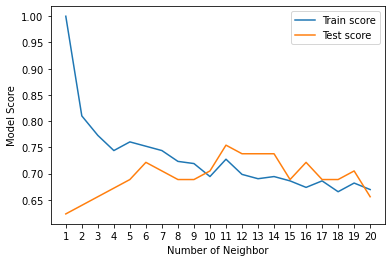

In [58]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbor")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the Test data : {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning with RandomizedSearchCV

We are goiong to tune:
    
   * LogisticRegression()
   * RandomForestClassifier()
    

In [59]:
# Creating hyperparam grid for logisticregression

log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Creating hyperparameter for RandomForestClassifier

rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5 ,10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)} 

In [60]:
# Tuning LogisticRegression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [61]:
# checking the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [62]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [64]:

# Tuning RandomForestClassifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train,y_train)


Wall time: 0 ns
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 0 ns


In [66]:
# Finding the best params
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [67]:
# Evaluating the model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [68]:
model_scores

{'Logistic Regression': 88.52459016393442,
 'KNN': 68.85245901639344,
 'Random Forest': 83.60655737704919,
 'SVM': 70.49180327868852,
 'GradientBoosting Classifier': 77.04918032786885,
 'Ada Boost Classifier': 80.32786885245902,
 'GaussianNB': 86.88524590163934,
 'Linear SVC': 85.24590163934425,
 'SGD Classifier': 60.65573770491803,
 'DecisionTreeClassifier': 83.60655737704919}

In [69]:
# Different hyperparameters for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver":["liblinear"]}


gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [70]:
# Checking the best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
# Evaluate the grid search Logistic Regression
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [72]:
model_scores

{'Logistic Regression': 88.52459016393442,
 'KNN': 68.85245901639344,
 'Random Forest': 83.60655737704919,
 'SVM': 70.49180327868852,
 'GradientBoosting Classifier': 77.04918032786885,
 'Ada Boost Classifier': 80.32786885245902,
 'GaussianNB': 86.88524590163934,
 'Linear SVC': 85.24590163934425,
 'SGD Classifier': 60.65573770491803,
 'DecisionTreeClassifier': 83.60655737704919}

In [73]:
# Different Hyperparamerter for RF
rf_grid = {"n_estimators": np.arange(10,400,50),
           "max_depth": [None, 3, 5],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,6,2)}

gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=True)

gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360])},
             verbose=True)

In [74]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 10}

In [75]:
#Evaluating the gs
gs_rf.score(X_test,y_test)

0.8524590163934426

### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC core
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [76]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [77]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [78]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

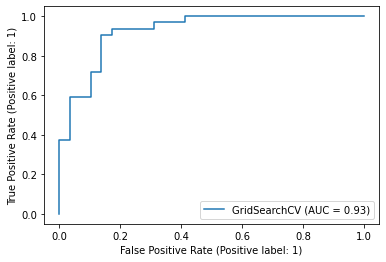

In [79]:
# PLotting roc curve and calculating AUC metric for logistic regression
plot_roc_curve(gs_log_reg, X_test, y_test);

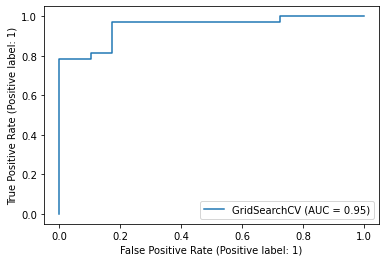

In [80]:
# roc curve for Random Forest
plot_roc_curve(gs_rf, X_test,y_test);

In [81]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


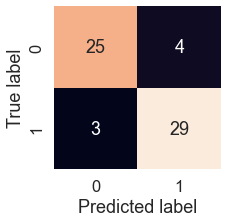

In [82]:
# PLotting confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    PLots confusion matrix using Seabrons heatmap()
    """
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_preds)

In [83]:
# Classification report
print(classification_report(y_test,y_preds))  # but here are only using 1st set of test data so we will use cv for proper report

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrix using cross-validation

Calculating accuracy,precision, recall and f1-score of our model using cross-validation.. cross_val_score()

In [84]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [85]:
# Creating a new classifier with best params
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [86]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,x,y,cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [87]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [88]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [89]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [90]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [91]:
# Cross-validated f1-score
cv_f1_score = cross_val_score(clf, x, y, cv=5, scoring="f1")

cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

In [92]:
# computing cross-validation for All models
models = {
          "Logistic_Regression":LogisticRegression(),
          "Random Forrest" : RandomForestClassifier(),
          "Ada Boost Classifier": AdaBoostClassifier(),
          "SVM": SVC(),
          "Gaussian Naive Bayes": GaussianNB(),
          "KNN": KNeighborsClassifier(n_neighbors=11),
          "GD Classifier":GradientBoostingClassifier(),
          "SGD": SGDClassifier(),
          "LinearSVC":LinearSVC(),
          "DecisionTree": DecisionTreeClassifier()
}

def cross_val_all_models(clf,x,y,score):
    print(f"The Scoring Metric is : {score}")
    cv_scores = {}
    
    for name,model in clf.items():
        cv = cross_val_score(model,x,y,cv=5,scoring=score)
        cv_scores[name] = np.mean(cv)
    return cv_scores

In [93]:
cross_val_all_models(models,x,y,"accuracy")

The Scoring Metric is : accuracy


{'Logistic_Regression': 0.8281967213114754,
 'Random Forrest': 0.8314207650273223,
 'Ada Boost Classifier': 0.7851366120218579,
 'SVM': 0.6434972677595628,
 'Gaussian Naive Bayes': 0.8050819672131148,
 'KNN': 0.6536612021857924,
 'GD Classifier': 0.8149726775956283,
 'SGD': 0.6666666666666667,
 'LinearSVC': 0.7489617486338798,
 'DecisionTree': 0.7555191256830602}

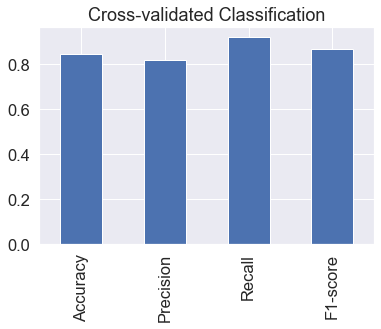

In [94]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1-score": cv_f1_score},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification",
                      legend=False);

### Feature Importance

Feature importance is another as asking, "which features contributed most to the  outcomes of the model and how did they contribute?"

Finding feature imoprtance is different for each machine learning model.

In [95]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver= "liblinear")

clf.fit(X_train,y_train);

In [96]:
# Checking coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [97]:
# Match coef's pf features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

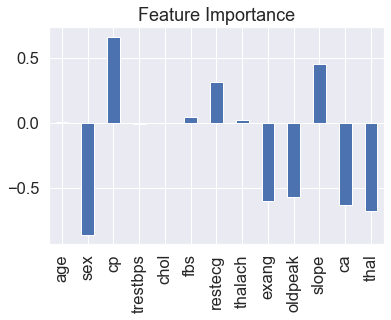

In [98]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);